In [1]:
import numpy as np
from scipy import stats
from scipy import optimize as opt
from scipy.stats import beta, uniform
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\owner\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\owner\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\owner\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
plt.style.use('ggplot')
np.random.seed(123)

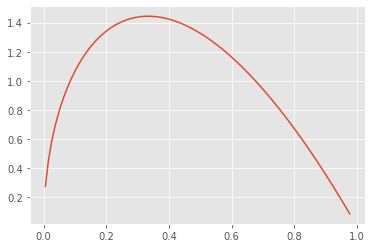

In [5]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

In [6]:
f = beta(a=a, b=b).pdf
res = opt.fmin(lambda x: -f(x), 0.3)
y_max = f(res)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


In [7]:
y_max

array([1.44337567])

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


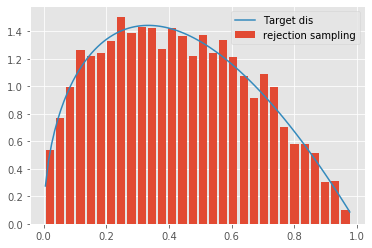

In [8]:
NMCS = 5000
x_mcs = uniform.rvs(size=NMCS)
r = uniform.rvs(size=NMCS) * y_max
accept = x_mcs[r <= f(x_mcs)]
plt.hist(accept, normed=True, bins=30, rwidth=0.8, label='rejection sampling')
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b), label='Target dis')
plt.legend()